# Project 6 EDA Notebook

### Jackie Ganyo
## Purpose: Exploratory Data Analysis (EDA) Jupyter Notebook Project

This Jupyter Notebook project aims to perform Exploratory Data Analysis (EDA) on Seaborn's health expenses dataset. The purpose of this project is to gain insights, discover patterns, and identify trends in the data through various statistical and visual exploration techniques. By analyzing the data, we can better understand its characteristics, uncover potential relationships between variables, and make informed decisions for further analysis or modeling.

Please note that this documentation comment is specific to the Jupyter Notebook project mentioned in the filepath provided.


In [197]:
#Import statements for all required libraries
import jupyter
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
import scipy

#### Load the dataset into a pandas DataFrame -  Seaborn Health Expense set



In [198]:
#Load the healthexp dataset from Seaborn, define it as variable 'df'
df = sns.load_dataset('healthexp')

#Set the theme for the Seaborn plots to dark
sns.set_theme(style="dark")


#### Inspect first rows of the DataFrame


In [199]:
print(df.head())

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9


#### Initial Data Inspection

In [200]:
#Display the first 10 rows of the dataset
print(df.head(10))

#Check the shape of the data frame
print(df.shape)

#Check the data types of the columns
print(df.dtypes)

   Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9
5  1971         Canada       313.391             72.8
6  1971        Germany       298.251             70.8
7  1971  Great Britain       134.172             71.9
8  1971          Japan       163.854             72.9
9  1971            USA       357.988             71.2
(274, 4)
Year                 int64
Country             object
Spending_USD       float64
Life_Expectancy    float64
dtype: object


#### Initial Descriptive Statistics

In [201]:
#Run the describe function on the data frame
print(df.describe())

              Year  Spending_USD  Life_Expectancy
count   274.000000    274.000000       274.000000
mean   1996.992701   2789.338905        77.909489
std      14.180933   2194.939785         3.276263
min    1970.000000    123.993000        70.600000
25%    1985.250000   1038.357000        75.525000
50%    1998.000000   2295.578000        78.100000
75%    2009.000000   4055.610000        80.575000
max    2020.000000  11859.179000        84.700000


#### Initial Data Distribution for Numerical Columns

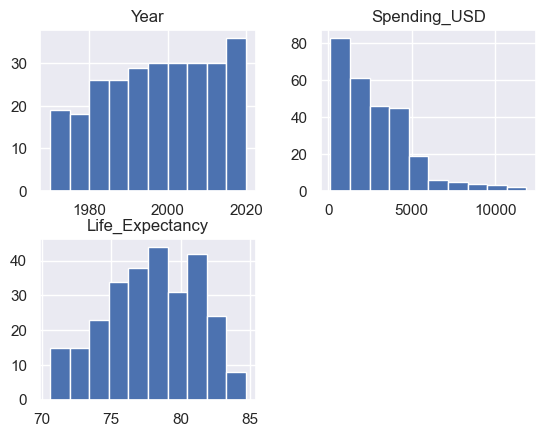

In [202]:
#Inspect histogram by calling the hist function on the data frame
df.hist()

#show the histogram
plt.show()

#### **Initial Data Distribution for Categorial Columns**

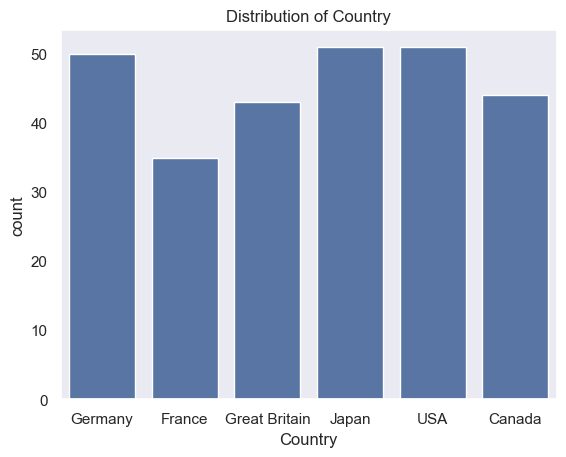

In [203]:
#Inspect value counts for categorical columns
df.value_counts()

#Inspect value counts for Country column
for col in df.select_dtypes(include=['object', 'category']).columns:
    #Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

#Show all plots
plt.show()    

#### **Initial Data Transformation & Feature Engineering**

In [204]:
#Rename at least one column

df.rename(columns={'Spending_USD':"Expense_USD"}, inplace=True)

#Add at least one column
df['Expense_per_Life_Expectancy'] = df['Expense_USD'] / df['Life_Expectancy']

#Display the first rows of the dataset to show changes made
print(df.head())

   Year        Country  Expense_USD  Life_Expectancy  \
0  1970        Germany      252.311             70.6   
1  1970         France      192.143             72.2   
2  1970  Great Britain      123.993             71.9   
3  1970          Japan      150.437             72.0   
4  1970            USA      326.961             70.9   

   Expense_per_Life_Expectancy  
0                     3.573810  
1                     2.661260  
2                     1.724520  
3                     2.089403  
4                     4.611580  


#### Initial Visualizations
Create a variety of chart types using seaborn and matplotlib to showcare different aspects of health expenses data. Include the goal for each chart-what you want to learn/explore, the type of chart your choose, display the chart, and tell your data story.  
Intuitively, one would think spending more on health would result in higher life expectancies. The goal for this initial set of visualizations is to determine if there is a relationship between amount of money spent and life expectancy. Secondly, does increased health sector spending equate to higher life expectancies. 

##### **Goal:** 

##### **Chart type:** Scatterplot of money spent and life expectancy.


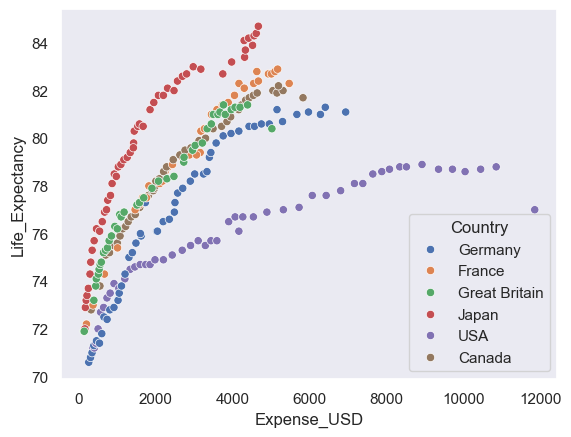

In [205]:

sns.scatterplot(
    data=df,
    x="Expense_USD", 
    y="Life_Expectancy",
    hue="Country"
)
    
plt.show()

##### Goal: 
##### Chart Type:

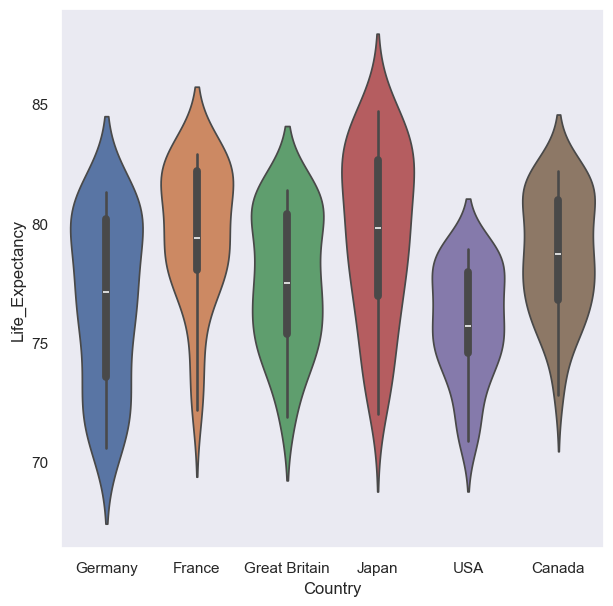

In [206]:
#Second visualization
plt.figure(figsize=(7,7))
sns.violinplot(
    y="Life_Expectancy",
    x="Country",
    hue="Country",
    data=df)

plt.show()

[Text(-24.375, 0.5, '')]

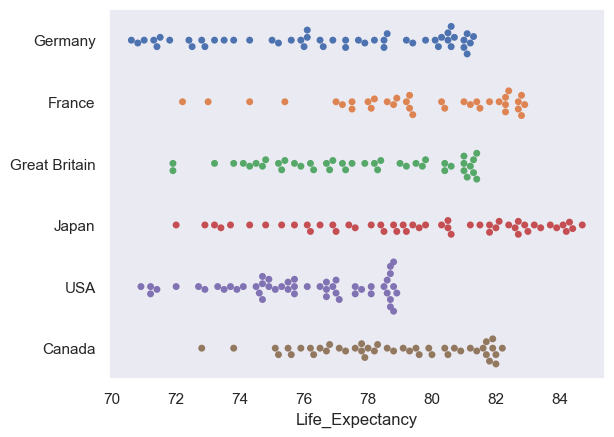

In [207]:
#Input a secondary visualization to see if it clarifies some of the information from violin plot

ax = sns.swarmplot(data=df, x="Life_Expectancy", y="Country", hue="Country")
ax.set(ylabel="")


##### Goal:
##### Chart Type: 

In [208]:
#Third visualization